In [1]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

from FABdiffME.targets.gaussian import Gaussian

### Test Gaussian restricted to unit square

In [2]:
dim = 2
target = Gaussian(dim=dim)

In [3]:
# Test whether the probability is zero outside the unit square
samples = jnp.array([[0.5]*dim, [1.2]*dim, [0.9]*dim, [-0.1]*dim])
print("probabilities", target.prob(samples))
print("log_probabilities:", target.log_prob(samples))

probabilities [0.85189502 0.         1.27087803 0.        ]
log_probabilities: [-0.16029197        -inf  0.23970803        -inf]


In [4]:
key = jax.random.PRNGKey(3)
gen_samples, target_eval_count = target.sample(key, 100)
print("shape of generated samples", gen_samples.shape)

7 / 100
shape of generated samples (100, 2)


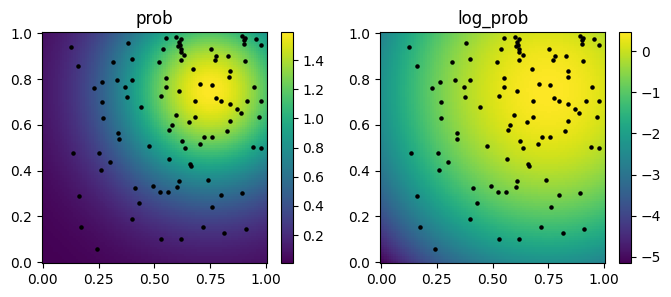

In [5]:
x1_axis = jnp.linspace(0,1,100)
x2_axis = jnp.linspace(0,1,100)
grid = jnp.dstack(jnp.meshgrid(x1_axis, x2_axis))
grid_re = grid.reshape([-1,2])

fig, axs = plt.subplots(1,2, figsize=(8,3))
# p
grid_prob = target.prob(grid_re)
grid_p = grid_prob.reshape(len(x2_axis), len(x1_axis))
diff = jnp.max(grid_p) - jnp.min(grid_p)
pcm0 = axs[0].pcolormesh(x1_axis, x2_axis, grid_p)
axs[0].set_title(r"prob")
cbar = fig.colorbar(pcm0, ax=axs[0])
# log p
grid_prob = target.log_prob(grid_re)
grid_p = grid_prob.reshape(len(x2_axis), len(x1_axis))
diff = jnp.max(grid_p) - jnp.min(grid_p)
pcm0 = axs[1].pcolormesh(x1_axis, x2_axis, grid_p)
axs[1].set_title(r"log_prob")
cbar = fig.colorbar(pcm0, ax=axs[1])

axs[0].scatter(gen_samples[:,0], gen_samples[:,1], c="black", s=5)
axs[1].scatter(gen_samples[:,0], gen_samples[:,1], c="black", s=5);